# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.
* Importaremos cada una de las tablas, nombrandolas por el nombre del archivo al que pertenecen para reconocerlas más fácilmente.
* Aplicaremos la función info() para obtener los valores ausentes, nombre de las columnas y el tipo de datos en el que estan almacenados. 
* Se imprimiran las primeras 5 filas para observar que los tipos de datos correspondan con el tipo de dato que estan almacenando

In [1]:
# importar librerías
import pandas as pd


In [2]:
# leer conjuntos de datos en los DataFrames
# Se nombra cada una de las tablas con el nombre de su respectivo archivo para identificarlas con mas facilidad.
instacart_orders =pd.read_csv("/datasets/instacart_orders.csv",sep=";") 
products =pd.read_csv("/datasets/products.csv",sep=";")
aisles = pd.read_csv("/datasets/aisles.csv",sep=";") 
departments = pd.read_csv("/datasets/departments.csv",sep=";")
order_products = pd.read_csv("/datasets/order_products.csv",sep=";")

In [3]:
# mostrar información del DataFrame
instacart_orders.info()
print(instacart_orders.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB
   order_id  user_id  order_number  order_dow  order_hour_of_day  \
0   1515936   183418            11          6                 13   
1   1690866   163593             5          5                 12   
2   1454967    39980             4          5                 19   
3   1768857    82516            56          0                 20   
4   3007858   196724             2          4                 12   

In [4]:
# mostrar información del DataFrame
products.info()
print(products.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
   product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4           5                          Green Chile Anytime Sauce         5   

   department_id  
0             19  
1             13  
2              7  
3              1  
4             13  


In [5]:
# mostrar información del DataFrame
aisles.info()
print(aisles.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB
   aisle_id                       aisle
0         1       prepared soups salads
1         2           specialty cheeses
2         3         energy granola bars
3         4               instant foods
4         5  marinades meat preparation


In [6]:
# mostrar información del DataFrame
departments.info()
print(departments.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes
   department_id department
0              1     frozen
1              2      other
2              3     bakery
3              4    produce
4              5    alcohol


In [7]:
# mostrar información del DataFrame
order_products.info()
print(order_products.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB
   order_id  product_id  add_to_cart_order  reordered
0   2141543       11440               17.0          0
1    567889        1560                1.0          1
2   2261212       26683                1.0          1
3    491251        8670               35.0          1
4   2571142        1940                5.0          1


## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.
* Los df estaban separados por ";" por lo que se tuvo que agregar "sep=";" al código para leer las tablas correctamente.

* Las columnas como order_id, product_id,etc. estan almacenadas como números enteros, sin embargo, se trata de digitos unicos para identificar valores, por otro lado, el tipo de dato que se encuentra actualmente no afecta a nuestro analisis, por lo que no se modifican.

* Existen columnas que contienen valores faltantes: "days_since_prior_order" de la tabla "instacart_orders", "product_name" de la tabla  "products".


# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.
* Verificaremos si hay valores duplicados en los df, mediante duplicate().
* En el paso anterior se identificaron dos columnas de diferentes tablas con valores ausentes que deberiamos atender con isna()



## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [8]:
# Revisa si hay pedidos duplicados
instacart_orders_duplicated = instacart_orders.duplicated() 
print("Cantidad de valores que se duplican", instacart_orders_duplicated.sum())
print(instacart_orders.value_counts().head(15))

Cantidad de valores que se duplican 15
order_id  user_id  order_number  order_dow  order_hour_of_day  days_since_prior_order
1021560   53767    3             3          2                  9.0                       2
467134    63189    21            3          2                  2.0                       2
391768    57671    19            3          2                  10.0                      2
2282673   86751    49            3          2                  2.0                       2
408114    68324    4             3          2                  18.0                      2
1918001   188546   14            3          2                  16.0                      2
1286742   183220   48            3          2                  4.0                       2
1112182   202304   84            3          2                  6.0                       2
2845099   31189    11            3          2                  7.0                       2
1919531   191501   32            3          2           

¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?
Tenemos valores duplicados, de acuerdo a los datos la información del día miercoles a las 2:00 a.m se duplicaron.

In [9]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
instacart_orders_filtered = instacart_orders[(instacart_orders["order_dow"]==3)&(instacart_orders["order_hour_of_day"]==2)]

print(instacart_orders_filtered.sort_values(by="order_number",ascending=True))
print()
print("Estas dos filas se repiten con exactamente los mismos valores en todas las columnas")
print()
print(instacart_orders_filtered.loc[273805,])
print(instacart_orders_filtered.loc[164581,])

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
324868   2232988    82565             1          3                  2   
200059   1782114   106752             1          3                  2   
359625    332561   201301             1          3                  2   
266232   1782114   106752             1          3                  2   
262169   1099720    57529             1          3                  2   
...          ...      ...           ...        ...                ...   
109466    851025   168387            54          3                  2   
468324    222962    54979            59          3                  2   
273805   1112182   202304            84          3                  2   
164581   1112182   202304            84          3                  2   
255538    577527     5253            96          3                  2   

        days_since_prior_order  
324868                     NaN  
200059                     NaN  
359625                  

¿Qué sugiere este resultado?
Al filtrar la tabla por el día y la hora obtenemos que hay filas duplicadas. Ordenando por medio del numero de orden que debería ser un valor unico obtenemos que hay valores repetidos en nuestra tabla y deben ser eliminados antes de trabajar con nuestra tabla.

In [10]:
# Elimina los pedidos duplicados
instacart_orders = instacart_orders.drop_duplicates().reset_index(drop=True)

In [11]:
# Vuelve a verificar si hay filas duplicadas
print("Número de valores duplicados =" , instacart_orders.duplicated().sum())

Número de valores duplicados = 0


In [12]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
print("Valores duplicados en order_id =" , instacart_orders.duplicated("order_id").sum())

Valores duplicados en order_id = 0


Describe brevemente tus hallazgos y lo que hiciste con ellos

Descubrimos que habia valores duplicados, sin embargo, se reviso que fueran completamente identicos para evitar eliminar información. Una vez ordenados, pudimos ubicar que en exactamente en un dia y a una hora hubo un error y se duplicaron 15 filas, despues procedimos a eliminarlos y reemplazamos el data Frame sin duplicados reiniciando el index. Obteniendo una tabla libre de duplicados.


### `products` data frame

In [13]:
# Verifica si hay filas totalmente duplicadas
print(products.duplicated().sum())

0


In [14]:
# Revisa únicamente si hay ID de departamentos duplicados
print(products["department_id"].duplicated().sum())

49673


In [15]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
products_upper= products["product_name"].str.upper()

print("Veces que se repiten filas", products_upper.duplicated().sum())
print(products_upper.value_counts())
#Observando que tenemos valores repetidos, buscamos duplicados en product_id solo para descartar que la información esta duplicada.
print(products["product_id"].duplicated().sum())

Veces que se repiten filas 1361
GREEN TEA WITH GINSENG AND HONEY                                 3
SPREADABLE BUTTER WITH CANOLA OIL                                2
LASAGNA WITH MEAT SAUCE                                          2
CAULIFLOWER HEAD                                                 2
RIGATONI WITH CHICKEN & PESTO                                    2
                                                                ..
VEGGIE ROTINI PASTA                                              1
ACAI 100 MANGO PASSION FRUIT ACAI BERRY SUPERFOOD JUICE BLEND    1
BLACK RASPBERRY DRINK                                            1
KLONDIKE MEDLEY PETITE POTATOES                                  1
MEGA STUF                                                        1
Name: product_name, Length: 48332, dtype: int64
0


In [16]:
# Revisa si hay nombres duplicados de productos no faltantes
print("Valores duplicados de productos no faltantes" ,products[~products["product_name"].isna()].duplicated().sum())

Valores duplicados de productos no faltantes 0


Describe brevemente tus hallazgos y lo que hiciste con ellos.
Aunque de primera instancia no tenemos filas completamente duplicadas, si tenemos valores duplicados en la columna "product_name", sin embargo, ningun "product id" se repite, siendo todos valores unicos, por lo cual no es necesario deshacernos de los duplicados, ya que solo es un nombre descriptivo.

### `departments` data frame

In [17]:
# Revisa si hay filas totalmente duplicadas
print("Número de filas duplicadas",departments.duplicated().sum())

Número de filas duplicadas 0


In [18]:
# Revisa únicamente si hay IDs duplicadas de productos
print("IDs duplicados de departamentos",departments["department_id"].duplicated().sum())

IDs duplicados de departamentos 0


Describe brevemente tus hallazgos y lo que hiciste con ellos.
Dado que no contamos con filas completamente duplicadas ni ids duplicados no se requieren mas acciones para esta tabla.

### `aisles` data frame

In [19]:
# Revisa si hay filas totalmente duplicadas
print("Numero de filas duplicadas", aisles.duplicated().sum())

Numero de filas duplicadas 0


In [20]:
# Revisa únicamente si hay IDs duplicadas de productos
print("Número de IDs duplicados", aisles["aisle_id"].duplicated().sum())

Número de IDs duplicados 0


Describe brevemente tus hallazgos y lo que hiciste con ellos.
Al igual que la tabla anterior no tenemos ningún problema con valores duplicados en nuestra tabla. Por lo que podemos trabajar con ella sin problemas.

### `order_products` data frame

In [21]:
# Revisa si hay filas totalmente duplicadas
print("Número de filas duplicadas", order_products.duplicated().sum())

Número de filas duplicadas 0


In [22]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
print("Número de duplicados en:")
print("Order_id",order_products["order_id"].duplicated().sum())
print("product_id",order_products["product_id"].duplicated().sum())

Número de duplicados en:
Order_id 4094961
product_id 4499434


Describe brevemente tus hallazgos y lo que hiciste con ellos.
No tenemos filas duplicadas, pero si IDs duplicados, esto se debe a que tanto una misma orden puede estar compuesta de varios productos y por lo tanto se repite, como un mismo producto puede ser ordenado para diferentes ordenes, por lo que no hace falta eliminar valores duplicados.

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [23]:
# Encuentra los valores ausentes en la columna 'product_name'
products_name_nans = products["product_name"].isna() #creamos una variable con los valores ausentes por si la ocupamos varias veces en el código.
print("Valores ausentes en columna product_name",products_name_nans.sum())
print(products[products_name_nans])

Valores ausentes en columna product_name 1258
       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


Describe brevemente cuáles son tus hallazgos.
Encontramos que tenemos 1,258 valores ausentes en esta columna. Los valores ausentes pertenecen al pasillo 100.

In [24]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
print(products[(products["product_name"].isna())&(products["aisle_id"]==100)])

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


Describe brevemente cuáles son tus hallazgos.
Comparando los valores ausentes con los ausentes filtrados por el pasillo 100 observamos que todos pertenecen al mismo pasillo.

In [25]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
print(products[(products_name_nans)&(products["department_id"]==21)])

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


Describe brevemente cuáles son tus hallazgos.
Nuevamente obtenemos el mismo numero de filas 1258 coincidentes con nuestro filtro, siendo que los productos del pasillo 100 del departamento 21 han desaparecido. 

In [26]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
print(aisles[aisles["aisle_id"]==100])
print(departments[departments["department_id"]==21])

    aisle_id    aisle
99       100  missing
    department_id department
20             21    missing


Describe brevemente cuáles son tus hallazgos.
En ambos casos, contienen el valor de missing, por lo cual no nos genera ningún beneficio juntar los data frames para reemplazar los valores, y procederemos a un reemplazo simple.

In [27]:
# Completa los nombres de productos ausentes con 'Unknown'
products["product_name"].fillna("Unknown",inplace=True)
print("Número de valores ausentes", products["product_name"].isna().sum())
print(products.query("product_name=='Unknown'"))

Número de valores ausentes 0
       product_id product_name  aisle_id  department_id
37             38      Unknown       100             21
71             72      Unknown       100             21
109           110      Unknown       100             21
296           297      Unknown       100             21
416           417      Unknown       100             21
...           ...          ...       ...            ...
49552       49553      Unknown       100             21
49574       49575      Unknown       100             21
49640       49641      Unknown       100             21
49663       49664      Unknown       100             21
49668       49669      Unknown       100             21

[1258 rows x 4 columns]


Describe brevemente tus hallazgos y lo que hiciste con ellos.
Finalmente todos los valores ausentes se cambiaron por Unknown ya que aunque tenemos una tabla complementaria, todos los productos que se encuentran en el pasillo 100 en el departamento 21 son productos que se encuentran perdidos, prodriamos sacar la conclusión que son articulos de temporada u obsoletos, pero no tenemos suficiente información para llegar a una conclusión acertada por lo que conservamos los valores renombrados. 

### `orders` data frame

In [28]:
# Encuentra los valores ausentes
print(order_products.isna().sum())

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


In [29]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
print(order_products[(order_products["reordered"]!=0)].isna().sum())
print()
print(order_products.query("reordered != 0").isna().sum())

order_id               0
product_id             0
add_to_cart_order    319
reordered              0
dtype: int64

order_id               0
product_id             0
add_to_cart_order    319
reordered              0
dtype: int64


Describe brevemente tus hallazgos y lo que hiciste con ellos.
Si tenemos valores ausentes en la columna add_to_cart_order, para filas donde se ha reordenado. Por lo que tenemos que verificar la naturaleza de estos para decidir si se eliminan o se conservan. 

### `order_products` data frame

In [33]:
# Encuentra los valores ausentes

print(order_products.isna().sum())

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


In [34]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
print(order_products["add_to_cart_order"].min())
print()
print(order_products["add_to_cart_order"].max())

1.0

64.0


Describe brevemente cuáles son tus hallazgos.
Descubrimos que hay varias columnas con valores ausentes en todas las columnas, probablemente una perdida de información y deben ser eliminadas. 

In [35]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
add_to_cart_nans= order_products[order_products["add_to_cart_order"].isna()]["order_id"]
print(add_to_cart_nans)

737        2449164
9926       1968313
14394      2926893
16418      1717990
30114      1959075
            ...   
4505662    1800005
4511400    1633337
4517562     404157
4534112    1673227
4535739    1832957
Name: order_id, Length: 836, dtype: int64


In [36]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
order_products_quantity =order_products[order_products["order_id"].isin(add_to_cart_nans)].groupby("order_id")["product_id"].count()
print(order_products_quantity)
print()
print("Valor minimo de productos por orden",order_products_quantity.min())

order_id
9310        65
61355      127
102236      95
129627      69
165801      70
          ... 
2999801     70
3125735     86
3308010    115
3347453     71
3383594     69
Name: product_id, Length: 70, dtype: int64

Valor minimo de productos por orden 65


Describe brevemente cuáles son tus hallazgos.
Descubrimos que tenemos una perdida de información que se provoca en las ordenes despues de pasar los 64 articulos por orden, provocando que los valores +65 sean valores ausentes en esas filas para esa orden.

In [37]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
order_products["add_to_cart_order"]=order_products["add_to_cart_order"].fillna("999").astype("int")

Describe brevemente tus hallazgos y lo que hiciste con ellos.
Encontramos que el sistema que registra las ordenes tiene un error que provoca que los pedidos mayores a 64 productos, generen valores ausentes. Posteriormente procedimos a reemplazar los valores ausentes por 999 en la columna add_to_cart_order.

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos.

Descubrimos que teniamos varios valores ausentes como duplicados, algunas tablas requerian que verificaramos si realmente eran valores duplicados relevantes mediante filtros para posteriormente eliminarlos, mientras que otros casos, se tuvo que consultar otras tablas para llegar a esa conclusion. Finalmente, es importante realizar un prepocesamiento en cada uno de estos casos, y verificar que de acuerdo a la naturaleza de los datos sea factible eliminar, reemplazar u omitir cambios en la información.

# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [38]:
print("Rango de datos de order_hour_of_day" ,[(instacart_orders["order_hour_of_day"].min()),(instacart_orders["order_hour_of_day"].max())])
print("Rango de datos de order_dow" ,[(instacart_orders["order_dow"].min()),(instacart_orders["order_dow"].max())])

Rango de datos de order_hour_of_day [0, 23]
Rango de datos de order_dow [0, 6]


<AxesSubplot:title={'center':'Número de ordenes por hora del día'}, xlabel='Hora del día', ylabel='Número de personas'>

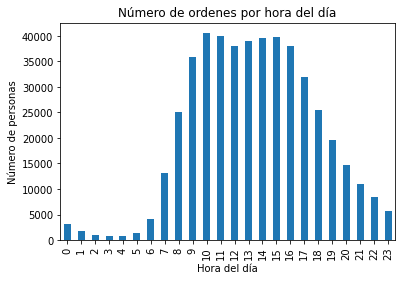

In [39]:
instacart_orders.groupby("order_hour_of_day")["order_id"].count().plot(kind="bar", title="Número de ordenes por hora del día", xlabel= "Hora del día", ylabel="Número de personas")

<AxesSubplot:title={'center':'Número de ordenes por día de la semana'}, xlabel='Día de la semana', ylabel='Número de personas'>

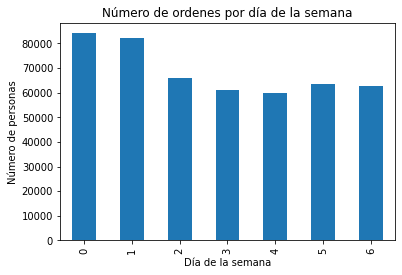

In [40]:
instacart_orders.groupby("order_dow")["order_id"].count().plot(kind="bar",title="Número de ordenes por día de la semana", xlabel="Día de la semana", ylabel="Número de personas")

<AxesSubplot:title={'center':'Tiempo entre ordenes'}, xlabel='Número de días transcurridos', ylabel='Número de personas'>

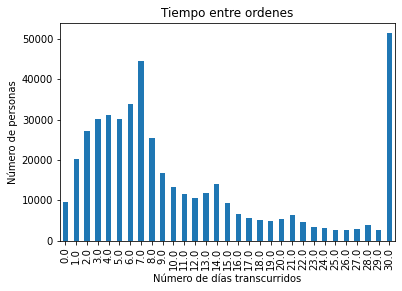

In [41]:
instacart_orders.groupby("days_since_prior_order")["order_id"].count().plot(kind="bar",title= "Tiempo entre ordenes", xlabel= "Número de días transcurridos",ylabel="Número de personas")

Escribe aquí tus conclusiones

El rango de los datos se encuentra en los valores esperados por lo que no es necesario hacer cambios.

* En el primer gráfico se puede observar que a las 10 am es el momento donde se realizan más ordenes, y va disminuyendo conforme va avanzando el día.

* Podemos observar que el día domingo y el día lunes son los días con más pedidos y el jueves el día con menos pedidos.

* Conforme a los datos del gráfico, obtenemos que el tiempo que tarda las personas en volver a pedir son 8 días, por otro lado aunque la columna del dia 30 es mucho más grande, nos nos muestra la realidad, ya que desconocemos si la información solo considera un maximo de 30 días para un nuevo pedido, cualquier valor arriba de 30 días es redondeado a 30. También observamos que el número de personas que vuelven a ordenar va disminuyendo despues de los primeros 8 días.

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

In [42]:
instacart_orders.groupby("order_hour_of_day")["order_id"].count()

order_hour_of_day
0      3180
1      1763
2       989
3       770
4       765
5      1371
6      4215
7     13043
8     25024
9     35896
10    40578
11    40032
12    38034
13    39007
14    39631
15    39789
16    38112
17    31930
18    25510
19    19547
20    14624
21    11019
22     8512
23     5611
Name: order_id, dtype: int64

Escribe aquí tus conclusiones
Podemos concluir que en el horario de 9 am a 18 pm es el rango de horas mas activo, esta conducta podría deberse a que corresponde con el horario de apertura y cierre de algunos establecimientos.

### [A3] ¿Qué día de la semana compran víveres las personas?

In [43]:
instacart_orders.groupby("order_dow")["order_id"].count()

order_dow
0    84090
1    82185
2    65833
3    60897
4    59810
5    63488
6    62649
Name: order_id, dtype: int64

Escribe aquí tus conclusiones
Los días y lunes son los dos días que se compran más productos, probablemente este comportamiento se deba a que son los viveres que ocuparan durante la semana.
Por otro lado, el dia jueves, es el día que se compran menos 

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

In [44]:
orders_by_days_since_prior = instacart_orders.groupby("days_since_prior_order")["order_id"].count()
print(orders_by_days_since_prior)


days_since_prior_order
0.0      9589
1.0     20179
2.0     27138
3.0     30224
4.0     31006
5.0     30096
6.0     33930
7.0     44577
8.0     25361
9.0     16753
10.0    13309
11.0    11467
12.0    10658
13.0    11737
14.0    13992
15.0     9416
16.0     6587
17.0     5498
18.0     4971
19.0     4939
20.0     5302
21.0     6448
22.0     4514
23.0     3337
24.0     3015
25.0     2711
26.0     2640
27.0     2986
28.0     3745
29.0     2673
30.0    51337
Name: order_id, dtype: int64


Escribe aquí tus conclusiones
Al día 9 es cuando existen más eventos para reordenar. 

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

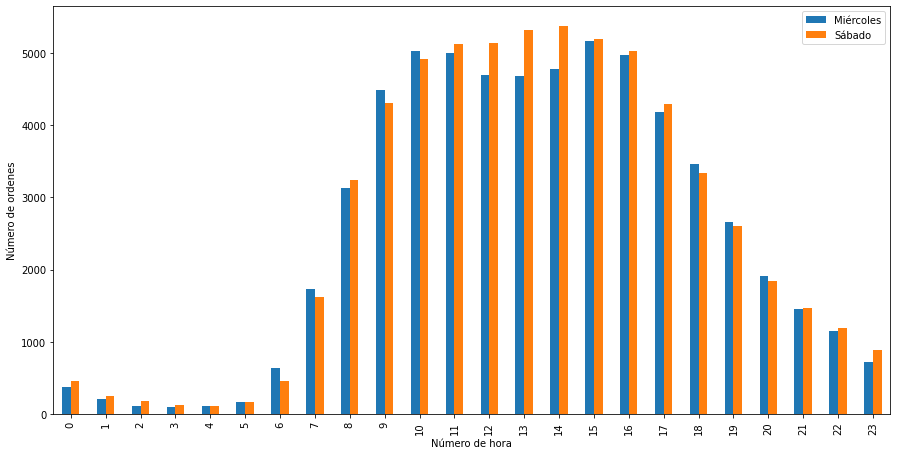

In [45]:
from matplotlib import pyplot as plt
(
    instacart_orders
    .query("(order_dow == 6) or (order_dow == 3)")
    .pivot_table(index="order_hour_of_day", columns= "order_dow", values="order_id", aggfunc="count")
).plot(kind="bar", xlabel="Número de hora",ylabel="Número de ordenes",figsize=[15,7.5])
plt.legend(["Miércoles","Sábado"])


Escribe aquí tus conclusiones
Podemos observar que los miercoles de 6 am a 10 am existen mas ordenes que en los días sábados, que de 12 am a 17 pm se generan más ordenes en los días sábados respecto al miercoles. 

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

<AxesSubplot:title={'center':'Distribución por número de pedidos por cliente'}, ylabel='Frequency'>

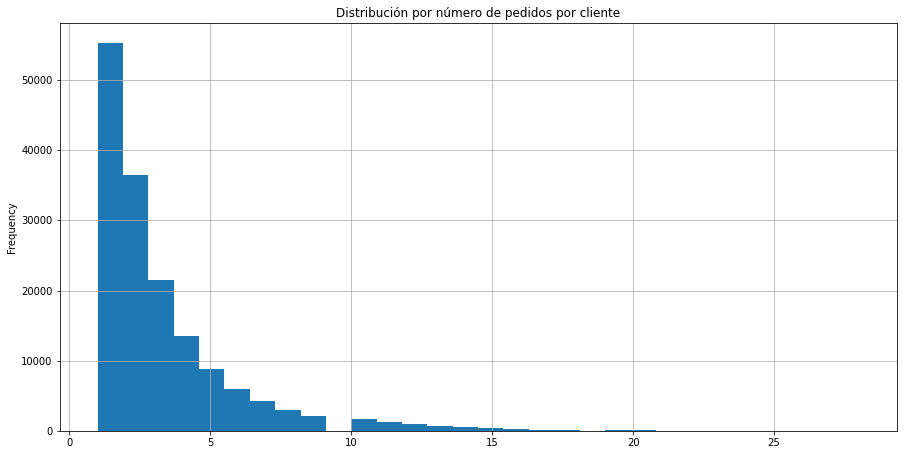

In [46]:
instacart_orders.groupby("user_id")["order_id"].count().plot(kind="hist",title="Distribución por número de pedidos por cliente" ,bins=30 ,figsize=[15,7.5],grid=True)


Escribe aquí tus conclusiones
Podemos observar que la mayoria de los clientes realizan un solo pedido, y este valor va disminuyendo drasticamente.

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [47]:
order_products_with_name = pd.merge(
    order_products,
    products,
    on="product_id"
)

order_gp =order_products_with_name.groupby(["product_id","product_name"])
count_order = order_gp["product_id"].count()
print(count_order.sort_values(ascending=False).head(20))

product_id  product_name            
24852       Banana                      66050
13176       Bag of Organic Bananas      53297
21137       Organic Strawberries        37039
21903       Organic Baby Spinach        33971
47209       Organic Hass Avocado        29773
47766       Organic Avocado             24689
47626       Large Lemon                 21495
16797       Strawberries                20018
26209       Limes                       19690
27845       Organic Whole Milk          19600
27966       Organic Raspberries         19197
22935       Organic Yellow Onion        15898
24964       Organic Garlic              15292
45007       Organic Zucchini            14584
39275       Organic Blueberries         13879
49683       Cucumber Kirby              13675
28204       Organic Fuji Apple          12544
5876        Organic Lemon               12232
8277        Apple Honeycrisp Organic    11993
40706       Organic Grape Tomatoes      11781
Name: product_id, dtype: int64


Escribe aquí tus conclusiones
Observamos que el producto top son las bananas, seguidos por frutas organicas.

# [C]

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

<AxesSubplot:title={'center':'Artículos comprados normalmente en un pedido'}, ylabel='Frequency'>

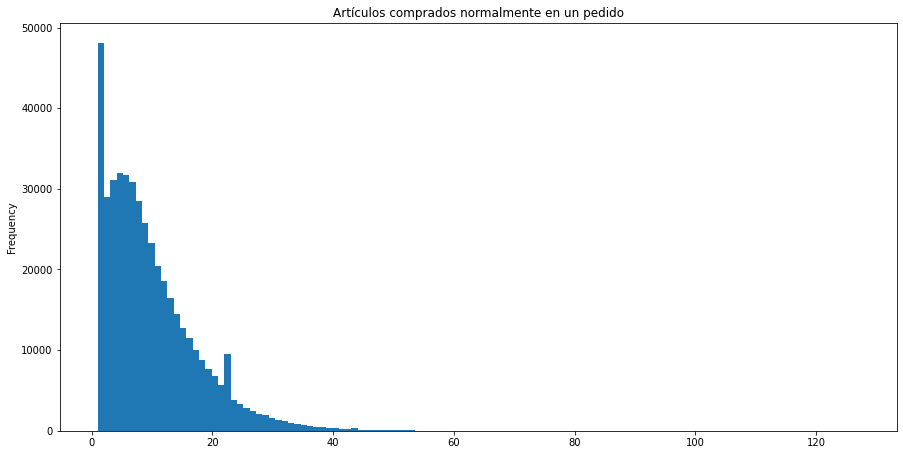

In [48]:
order_products.groupby("order_id")["product_id"].count().plot(
    kind="hist",
    title="Artículos comprados normalmente en un pedido",
    bins= 120,
    figsize=[15,7.5]
)


Escribe aquí tus conclusiones
Podemos observar que las personas suelen comprar un solo articulo por orden, y va disminuyendo conforme van aumentando los articulos por orden. 

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [49]:
print(order_products_with_name.groupby(["product_id","product_name"])["reordered"].sum().sort_values(ascending=False).head(20))

product_id  product_name            
24852       Banana                      55763
13176       Bag of Organic Bananas      44450
21137       Organic Strawberries        28639
21903       Organic Baby Spinach        26233
47209       Organic Hass Avocado        23629
47766       Organic Avocado             18743
27845       Organic Whole Milk          16251
47626       Large Lemon                 15044
27966       Organic Raspberries         14748
16797       Strawberries                13945
26209       Limes                       13327
22935       Organic Yellow Onion        11145
24964       Organic Garlic              10411
45007       Organic Zucchini            10076
49683       Cucumber Kirby               9538
28204       Organic Fuji Apple           8989
8277        Apple Honeycrisp Organic     8836
39275       Organic Blueberries          8799
5876        Organic Lemon                8412
49235       Organic Half & Half          8389
Name: reordered, dtype: int64


Escribe aquí tus conclusiones
Nuevamente las bananas parecen ser los productos que se reordenan más, al igual que algunas frutas y verduras organicas.

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [50]:
order_products_with_name.groupby(["product_id","product_name"])["reordered"].mean().head(20)

product_id  product_name                                                     
1           Chocolate Sandwich Cookies                                           0.564286
2           All-Seasons Salt                                                     0.000000
3           Robust Golden Unsweetened Oolong Tea                                 0.738095
4           Smart Ones Classic Favorites Mini Rigatoni With Vodka Cream Sauce    0.510204
7           Pure Coconut Water With Orange                                       0.500000
8           Cut Russet Potatoes Steam N' Mash                                    0.315789
9           Light Strawberry Blueberry Yogurt                                    0.761905
10          Sparkling Orange Juice & Prickly Pear Beverage                       0.448071
11          Peach Mango Juice                                                    0.625000
12          Chocolate Fudge Layer Cake                                           0.390244
13          Saline Nas

Escribe aquí tus conclusiones
Podemos observar que la mayoria de los productos se vuelven a reordenar aunque hay algunos que parece que solo se compran una vez y no se vuelven a reordenar.

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [51]:
order_products_with_userid = pd.merge(
    order_products_with_name,
    instacart_orders,
    on="order_id"
)

In [52]:
order_products_with_userid.groupby(["user_id","product_id","product_name"])["reordered"].mean()

user_id  product_id  product_name                                                    
2        9681        Chicken Tikka Masala with Cumin Infused Basmati Rice Frozen Meal    0.0
         12000       Baked Organic Sea Salt Crunchy Pea Snack                            0.0
         13176       Bag of Organic Bananas                                              0.0
         16589       Plantain Chips                                                      0.0
         20574       Roasted Turkey                                                      0.0
                                                                                        ... 
206209   39216       Original Multigrain Spoonfuls Cereal                                0.0
         40992       Chopped Tomatoes                                                    0.0
         41213       French Loaf                                                         1.0
         41665       Organic Mexican Blend Finely Shredded Cheese            

Escribe aquí tus conclusiones
Aplicando merge() a Order_products_with_name e instacart_orders, mediante la columna order_id, logramos unir ambas tablas, para posteriormente agruparlas por reordered y aplicar un promedio para obtener la proporción de cada uno de los productos, reordenados por usuario.

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [53]:
filtered_order_products= order_products_with_userid.query("add_to_cart_order==1")
filtered_order_products.groupby(["product_id","product_name"])["add_to_cart_order"].count().sort_values(ascending=False).head(20)

product_id  product_name               
24852       Banana                         15562
13176       Bag of Organic Bananas         11026
27845       Organic Whole Milk              4363
21137       Organic Strawberries            3946
47209       Organic Hass Avocado            3390
21903       Organic Baby Spinach            3336
47766       Organic Avocado                 3044
19660       Spring Water                    2336
16797       Strawberries                    2308
27966       Organic Raspberries             2024
44632       Sparkling Water Grapefruit      1914
49235       Organic Half & Half             1797
47626       Large Lemon                     1737
196         Soda                            1733
38689       Organic Reduced Fat Milk        1397
26209       Limes                           1370
12341       Hass Avocados                   1340
5785        Organic Reduced Fat 2% Milk     1310
27086       Half & Half                     1309
43352       Raspberries      

Escribe aquí tus conclusiones
Después de filtrar el Data Frame que tienen la posición 1 y lo asignamos a una variable, posteriormente agrupamos por id de producto y nombre del producto, se aplico un count a la columna add_to__cart_order y se ordenaron los datos para obtener los 20 primeros.
Nuevamente las bananas son obtienen el primer puesto.

### Conclusion general del proyecto:

Es de suma importancia conocer la naturaleza de los datos para tomar decisiones acertadas con los datos ausentes y los datos duplicados.
Una vez que tratamos nuestros datos correctamente, podemos proceder a trabajar con nuestras tablas, tambien es de mucha importancia conocer nuestras tablas para poder combinar su contenido.
Los gráficos en algunos casos son muy útiles para presentar nuestra información, mientras que en otros casos es mucho mejor presentar los datos en tablas.
